# Ejercicio: Eigenfaces

Anteriormente exploramos un ejemplo del uso de una proyección PCA como selector de funciones para el reconocimiento facial con una máquina de vectores de soporte.
Aquí echaremos un vistazo atrás y exploraremos un poco más de lo que sucedió. Recuerde que estábamos utilizando el conjunto de datos Labeled Faces in the Wild (LFW) disponible a través de Scikit-Learn:

In [82]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

In [83]:
faces = fetch_lfw_people(min_faces_per_person=60)
X,y= faces.data, faces.target

In [84]:
X,y

(array([[0.00130719, 0.01045752, 0.04836601, ..., 0.06405229, 0.0627451 ,
         0.05620915],
        [0.33333334, 0.3529412 , 0.39738563, ..., 0.07450981, 0.07189543,
         0.00915033],
        [0.19346406, 0.17254902, 0.14640523, ..., 0.06405229, 0.04836601,
         0.04705882],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00130719, 0.        , 0.        , ..., 0.12156863, 0.1267974 ,
         0.12287582],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([1, 3, 3, ..., 7, 3, 5], dtype=int64))

In [85]:
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,0.001307,0.010458,0.048366,0.058824,0.138562,0.171242,0.145098,0.171242,0.183007,0.130719,...,0.027451,0.036601,0.030065,0.032680,0.043137,0.050980,0.050980,0.064052,0.062745,0.056209
1,0.333333,0.352941,0.397386,0.439216,0.487582,0.356863,0.269281,0.287582,0.334641,0.337255,...,0.444444,0.124183,0.065359,0.071895,0.065359,0.078431,0.073203,0.074510,0.071895,0.009150
2,0.193464,0.172549,0.146405,0.172549,0.198693,0.207843,0.211765,0.227451,0.193464,0.205229,...,0.096732,0.092810,0.091503,0.082353,0.074510,0.066667,0.065359,0.064052,0.048366,0.047059
3,0.222222,0.173856,0.322876,0.766013,0.981699,0.771242,0.250980,0.193464,0.215686,0.725490,...,0.436601,0.158170,0.118954,0.133333,0.122876,0.137255,0.146405,0.150327,0.145098,0.070588
4,0.002614,0.014379,0.032680,0.028758,0.027451,0.028758,0.033987,0.040523,0.099346,0.120261,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1344,0.000000,0.000000,0.001307,0.000000,0.000000,0.000000,0.001307,0.001307,0.001307,0.000000,...,0.171242,0.145098,0.129412,0.117647,0.111111,0.126797,0.120261,0.088889,0.003922,0.000000
1345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1346,0.001307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001307,0.001307,0.001307,...,0.132026,0.104575,0.116340,0.133333,0.126797,0.133333,0.132026,0.121569,0.126797,0.122876


In [86]:
pca = PCA()
pca.fit(df)#TODO

PCA()

In [87]:
# Lista el ratio de varianza
#TODO
pca.explained_variance_ratio_

array([2.7407187e-01, 5.7828993e-02, 5.4776616e-02, ..., 8.1758543e-07,
       6.2243953e-07, 3.8960832e-13], dtype=float32)

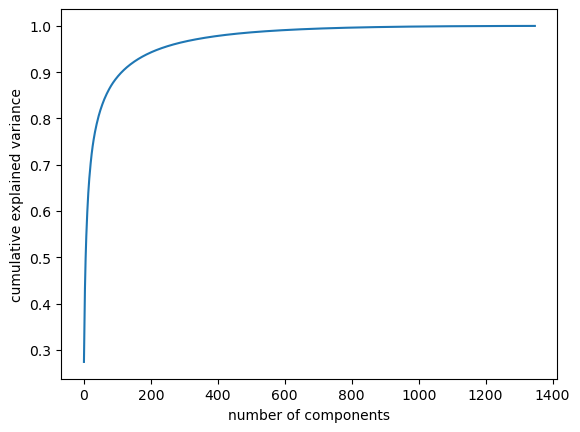

In [88]:
# Plotear la varianza explicada y determinar la cantidad de componentes
# a utilizar que mejor expliquen los datos

plt.plot(np.cumsum(pca.explained_variance_ratio_)) #TODO - Varianza
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [89]:
print ('Percentage of variance explained (150 components): ', np.cumsum(pca.explained_variance_ratio_)[149]*100)

Percentage of variance explained (150 components):  92.22443103790283


In [90]:
pca = PCA(n_components=150, 
          svd_solver='randomized', 
          random_state=42) #TODO agregar la cantida de componentes estimados que mejor expliquen los datos en base al plot anterior
pca.fit(df) #TODO

PCA(n_components=150, random_state=42, svd_solver='randomized')

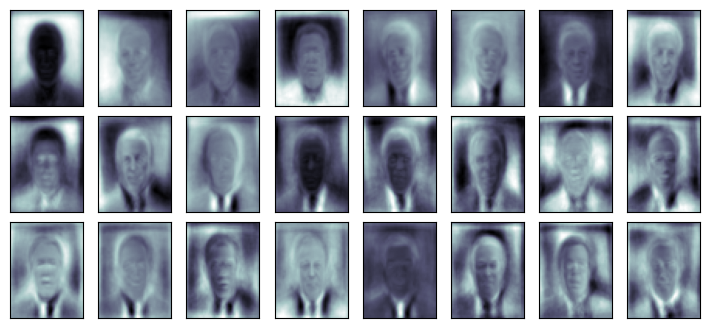

In [91]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

In [92]:
# Compute the components and projected faces
pca = pca.fit(df)#TODO
components = pca.transform(df)#TODO
projected = pca.inverse_transform(components)#TODO

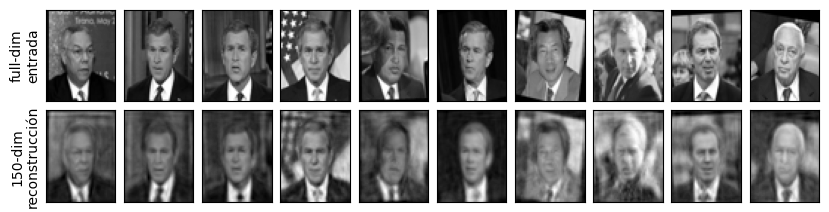

In [93]:
# Plot los resultados comparando los datos de entrada
# con los las imagenes en un espacio de dimensiones menor.

fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\nentrada')
ax[1, 0].set_ylabel('150-dim\nreconstrucción');

# Ejercicio 2 PCA en MNIST Dataset

El conjunto de datos MNIST se compone de imágenes de `28x28` píxeles de dígitos escritos a mano. Normalmente, cuando se entrenan modelos de aprendizaje automático, MNIST se vectoriza considerando todos los píxeles como un vector de `784` dimensiones o, en otras palabras, colocando todos los píxeles de `28x28` uno al lado del otro en una matriz de `1x784`. No muchos conjuntos de datos son mayores que `784D` (dimensiones), y si alguna vez ha trabajado con conjuntos de datos de alta dimensión, sabemos que el tiempo de entrenamiento y el tiempo de predicción son proporcionales al tamaño del conjunto de datos y la cantidad de características (dimensionalidad).
Dimensionalidad

Antes de continuar, deberíamos tener una pequeña discusión sobre la dimensionalidad y por qué es importante. En términos simplistas, es solo el número de columnas en el conjunto de datos, pero tiene importantes efectos posteriores en los modelos finales. En los extremos, el concepto de `maldición de la dimensionalidad` analiza que en espacios de alta dimensión algunas cosas simplemente dejan de funcionar correctamente. 

Incluso en problemas de dimensiones relativamente bajas, un conjunto de datos con más dimensiones requiere más parámetros para que el modelo los comprenda, y eso significa más filas para aprender esos parámetros de manera confiable. Si el número de filas en el conjunto de datos es fijo, agregar dimensiones adicionales sin agregar más información para que los modelos aprendan puede tener un efecto perjudicial en la precisión final del modelo.

Echemos un vistazo a cuánto tiempo lleva entrenar un clasificador gaussiano en el conjunto de datos MNIST:

In [98]:
#Importing the libraries
import numpy as np
from matplotlib import pyplot as plt

#to load MNIST - popular dataset of written digits
from sklearn.datasets import load_digits as LoadData 

In [99]:
#Let's load the data - it is pretty high-dimensional(64 features, each image of digit is 8x8)
X, y = LoadData(n_class=10, return_X_y = True, as_frame = True)
print(X.shape) #printing its shape
X.head(5) #and the first 5 elements

(1797, 64)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


[[ 0.  0. 11. 12.  0.  0.  0.  0.]
 [ 0.  2. 16. 16. 16. 13.  0.  0.]
 [ 0.  3. 16. 12. 10. 14.  0.  0.]
 [ 0.  1. 16.  1. 12. 15.  0.  0.]
 [ 0.  0. 13. 16.  9. 15.  2.  0.]
 [ 0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  9. 15.  4.  0.]
 [ 0.  0.  9. 12. 13.  3.  0.  0.]]


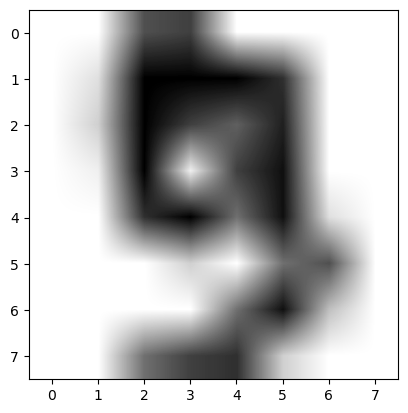

In [100]:
#Let's print a digit
print(np.array(X.iloc[9]).reshape(8,8))
plt.imshow(np.array(X.iloc[9]).reshape(8,8), cmap = 'binary', interpolation = 'bilinear')

In [115]:
from sklearn.decomposition import PCA
pca = PCA(0.95) #TODO - Utilizar valor porcentual - Ejemplo, 0.8, 0.9
X_reduced = pca.fit_transform(X) #TODO
print(X_reduced.shape)

(1797, 29)


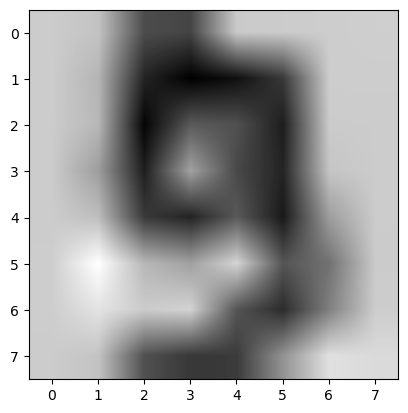

In [116]:
#Now let's recover out original data from compressed and recognise the same digit we had!
#We can recognise it because the amount of varience dropped was pretty small, so the recovered version is almost the same. 
X_recovered = pca.inverse_transform(X_reduced) #TODO
plt.imshow(X_recovered[9].reshape(8,8), cmap = 'binary', interpolation = 'bilinear')